In [1]:
from statsbombpy import sb
import pandas as pd
import numpy as np
import joblib
import pickle
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

# mpl soccer imports
from mplsoccer import Pitch, VerticalPitch, Sbopen, FontManager
from mplsoccer.dimensions import center_scale_dims
from mplsoccer.utils import FontManager


import plotly.graph_objects as go
from PIL import Image
import io


import json
import streamlit as st

from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OrdinalEncoder
import statsmodels.api as sm
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import RidgeCV, LassoCV
from sklearn.preprocessing import FunctionTransformer

# Classification
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
import xgboost as xgb
from xgboost import XGBClassifier
from sklearn.ensemble import GradientBoostingClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
# Evaluation
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import roc_curve, roc_auc_score

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.model_selection import KFold, cross_val_score

import os
import sys
sys.path.append(os.path.abspath("../src"))

from preprocessing_utils import clean_categories



## Use the statsbomb api open data and combine all the la liga games between 2005-2021

In [ ]:
# # Get competitions
# competitions_df = sb.competitions()

# la_liga_df = competitions_df[competitions_df['competition_name'] == 'La Liga']


# la_liga_id = la_liga_df['competition_id'].iloc[0]
# la_liga_id

# # Get match ID of the first Barcelona match
# league_id = la_liga_df['season_id']

# all_leagues = []  # Initialize an empty list


# for league in league_id:
#     events_df = sb.matches(competition_id=la_liga_id, season_id=league)
#     all_leagues.append(events_df)  # Append each DataFrame to the list

# # Concatenate all DataFrames into one big DataFrame
# combined_leagues = pd.concat(all_leagues, ignore_index=True)
# combined_leagues

,match_id,match_date,kick_off,competition,season,home_team,away_team,home_score,away_score,match_status,...,last_updated_360,match_week,competition_stage,stadium,referee,home_managers,away_managers,data_version,shot_fidelity_version,xy_fidelity_version
0,3773386,2020-10-31,21:00:00.000,Spain - La Liga,2020/2021,Deportivo Alavés,Barcelona,1,1,available,...,2023-07-25T04:25:41.348202,8,Regular Season,Estadio de Mendizorroza,NaN,Pablo Javier Machín Díez,Ronald Koeman,1.1.0,2,2
1,3773565,2021-01-09,18:30:00.000,Spain - La Liga,2020/2021,Granada,Barcelona,0,4,available,...,2023-07-25T04:30:16.058384,18,Regular Season,Estadio Nuevo Los Cármenes,Ricardo De Burgos Bengoetxea,Diego Martínez Penas,Ronald Koeman,1.1.0,2,2
2,3773457,2021-05-16,18:30:00.000,Spain - La Liga,2020/2021,Barcelona,Celta Vigo,1,2,available,...,2023-04-27T23:03:53.506485,37,Regular Season,Spotify Camp Nou,NaN,Ronald Koeman,Eduardo Germán Coudet,1.1.0,2,2
3,3773631,2021-02-07,21:00:00.000,Spain - La Liga,2020/2021,Real Betis,Barcelona,2,3,available,...,2023-07-25T03:56:34.733180,22,Regular Season,Estadio Benito Villamarín,NaN,Manuel Luis Pellegrini Ripamonti,Ronald Koeman,1.1.0,2,2
4,3773665,2021-03-06,21:00:00.000,Spain - La Liga,2020/2021,Osasuna,Barcelona,0,2,available,...,2023-04-28T02:57:03.412841,26,Regular Season,Estadio El Sadar,Guillermo Cuadra Fernández,Jagoba Arrasate Elustondo,Ronald Koeman,1.1.0,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
863,68315,2004-12-21,20:00:00.000,Spain - La Liga,2004/2005,Barcelona,Levante UD,2,1,available,...,2021-06-13T16:17:31.694,17,Regular Season,Spotify Camp Nou,David Fernández Borbalan,Frank Rijkaard,Bernd Schuster,1.1.0,2,2
864,69153,2004-12-11,20:00:00.000,Spain - La Liga,2004/2005,Albacete,Barcelona,1,2,available,...,2021-06-13T16:17:31.694,15,Regular Season,Estadio Carlos Belmonte,Alfonso Perez Burrull,José Manuel González López,Frank Rijkaard,1.1.0,2,2
865,68352,2005-04-17,21:00:00.000,Spain - La Liga,2004/2005,Barcelona,Getafe,2,0,available,...,2021-06-13T16:17:31.694,32,Regular Season,Spotify Camp Nou,Puentes Leira,Frank Rijkaard,Enrique Sánchez Flores,1.1.0,2,2
866,68353,2004-10-16,22:00:00.000,Spain - La Liga,2004/2005,Espanyol,Barcelona,0,1,available,...,2021-06-13T16:17:31.694,7,Regular Season,Estadi Olímpic Lluís Companys,Carlos Megía Dávila,Miguel Ángel Lotina Oruecheberría,Frank Rijkaard,1.1.0,2,2


#### Get just the matches for Barcelona and output all the events

In [ ]:
# # # Filter for Barcelona matches
# barcelona_combined_leagues =combined_leagues[(combined_leagues['home_team'] == 'Barcelona') | (combined_leagues['away_team'] == 'Barcelona')]

# # # Get match IDs of first Barcelona matches
# match_id = barcelona_combined_leagues['match_id']


# all_events = []  # Initialize an empty list


# for match in match_id:
#     events_df = sb.events(match_id=match)
#     all_events.append(events_df)  # Append each DataFrame to the list

# # Concatenate all DataFrames into one big DataFrame
# combined_df = pd.concat(all_events, ignore_index=True)


#### Get just Messi's rows from the above dataframe

In [ ]:
# Filter for Messi's events (player_id 5503)
# pd.set_option('display.max_columns', None)

# messi_events_df = combined_df[combined_df['player_id'] == 5503]

,50_50,bad_behaviour_card,ball_receipt_outcome,ball_recovery_offensive,ball_recovery_recovery_failure,carry_end_location,clearance_aerial_won,clearance_body_part,clearance_head,clearance_left_foot,clearance_right_foot,counterpress,dribble_nutmeg,dribble_outcome,dribble_overrun,duel_outcome,duel_type,duration,foul_committed_advantage,foul_committed_card,foul_committed_offensive,foul_committed_type,foul_won_advantage,foul_won_defensive,goalkeeper_body_part,goalkeeper_end_location,goalkeeper_outcome,goalkeeper_position,goalkeeper_technique,goalkeeper_type,id,index,interception_outcome,location,match_id,minute,miscontrol_aerial_won,off_camera,out,pass_aerial_won,pass_angle,pass_assisted_shot_id,pass_body_part,pass_cross,pass_cut_back,pass_deflected,pass_end_location,pass_height,pass_inswinging,pass_length,pass_no_touch,pass_outcome,pass_outswinging,pass_recipient,pass_recipient_id,pass_shot_assist,pass_switch,pass_technique,pass_through_ball,pass_type,period,play_pattern,player,player_id,position,possession,possession_team,possession_team_id,related_events,second,shot_aerial_won,shot_body_part,shot_end_location,shot_first_time,shot_freeze_frame,shot_key_pass_id,shot_one_on_one,shot_open_goal,shot_outcome,shot_statsbomb_xg,shot_technique,shot_type,substitution_outcome,substitution_outcome_id,substitution_replacement,substitution_replacement_id,tactics,team,team_id,timestamp,type,under_pressure,block_offensive,pass_goal_assist,pass_straight,block_deflection,clearance_other,shot_deflected,injury_stoppage_in_chain,pass_miscommunication,foul_committed_penalty,foul_won_penalty,goalkeeper_punched_out,goalkeeper_shot_saved_off_target,goalkeeper_shot_saved_to_post,shot_saved_off_target,shot_saved_to_post,block_save_block,dribble_no_touch,shot_redirect,shot_follows_dribble,goalkeeper_success_in_play,goalkeeper_lost_in_play,half_start_late_video_start,player_off_permanent,goalkeeper_lost_out,half_end_early_video_end,goalkeeper_success_out,goalkeeper_saved_to_post
481549,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,877f6aef-a505-4e05-9a7a-2841d1d057b2,2833,NaN,"[93.8, 40.9]",9717,62,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,From Free Kick,Lionel Andrés Messi Cuccittini,5503.0,Right Center Forward,141,Barcelona,217,[5256e6f8-27b3-4bdf-91c4-0069e9443b0a],40,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Barcelona,217,00:17:40.193,Ball Receipt*,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
495912,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.999547,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,79ad0479-0c82-4668-afd7-7fbefab8c7c3,2093,NaN,"[94.4, 48.4]",9837,46,NaN,NaN,NaN,NaN,0.488033,NaN,Left Foot,NaN,NaN,NaN,"[110.6, 57.0]",Ground Pass,NaN,18.341211,NaN,NaN,NaN,Luis Alberto Suárez Díaz,5246.0,NaN,NaN,NaN,NaN,NaN,2,From Throw In,Lionel Andrés Messi Cuccittini,5503.0,Right Center Forward,107,Atlético Madrid,212,[356cb301-f3ca-459c-8218-cd53562c8b75],16,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Barcelona,217,00:01:16.369,Pass,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1684202,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,25b462b0-01cb-4767-9e25-bca1644b2977,1522,NaN,"[84.9, 68.5]",69183,40,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,Regular Play,Lionel Andrés Messi Cuccittini,5503.0,Right Wing,88,Barcelona,217,[b5fd457d-75f7-4c52-8ac8-9d3026d8444c],44,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Barcelona,217,00:40:44.646,Ball Receipt*,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1677994,NaN,NaN,NaN

#### Save Messi's data to a csv file in the data folder because it took forever to load the Barcelona data

In [ ]:
# messi_events_df.to_csv("../data/messi_events.csv", index=False)

#### Load Messi's data

In [3]:
messi_df = pd.read_csv('../data/messi_events.csv')
messi_df.head(3)

C:\Users\vchan\AppData\Local\Temp\ipykernel_26368\2434251761.py:1: DtypeWarning: Columns (0,1,3,6,7,8,9,12,14,18,19,20,36,44,45,48,50,52,56,70,77,82,84,92,93,94,95,96,97,98,99,100,101,105,106,108,109,110,114) have mixed types. Specify dtype option on import or set low_memory=False.
  messi_df = pd.read_csv('../data/messi_events.csv')


,50_50,bad_behaviour_card,ball_receipt_outcome,ball_recovery_offensive,ball_recovery_recovery_failure,carry_end_location,clearance_aerial_won,clearance_body_part,clearance_head,clearance_left_foot,...,shot_redirect,shot_follows_dribble,goalkeeper_success_in_play,goalkeeper_lost_in_play,half_start_late_video_start,player_off_permanent,goalkeeper_lost_out,half_end_early_video_end,goalkeeper_success_out,goalkeeper_saved_to_post
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


#### Team shot attemps

In [4]:
messi_df['shot_outcome'].value_counts()

shot_outcome
Saved               644
Blocked             571
Off T               541
Goal                474
Post                 75
Wayward              30
Saved to Post        13
Saved Off Target      8
Name: count, dtype: int64

#### Filter to only shot opportunities

In [5]:
messi_shots = messi_df[messi_df['type']=='Shot'].copy()
print(messi_shots.shape)
messi_shots.sample(3)

(2356, 119)


,50_50,bad_behaviour_card,ball_receipt_outcome,ball_recovery_offensive,ball_recovery_recovery_failure,carry_end_location,clearance_aerial_won,clearance_body_part,clearance_head,clearance_left_foot,...,shot_redirect,shot_follows_dribble,goalkeeper_success_in_play,goalkeeper_lost_in_play,half_start_late_video_start,player_off_permanent,goalkeeper_lost_out,half_end_early_video_end,goalkeeper_success_out,goalkeeper_saved_to_post
69484,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
13099,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
275,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


#### All values for under pressure will be True or False

In [6]:
pd.set_option('display.max_columns', None)
messi_shots['under_pressure'].fillna(False, inplace=True)
messi_shots.sample(3)

C:\Users\vchan\AppData\Local\Temp\ipykernel_26368\2298657455.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  messi_shots['under_pressure'].fillna(False, inplace=True)
C:\Users\vchan\AppData\Local\Temp\ipykernel_26368\2298657455.py:2: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  messi_shots['under_pressure'

,50_50,bad_behaviour_card,ball_receipt_outcome,ball_recovery_offensive,ball_recovery_recovery_failure,carry_end_location,clearance_aerial_won,clearance_body_part,clearance_head,clearance_left_foot,clearance_right_foot,counterpress,dribble_nutmeg,dribble_outcome,dribble_overrun,duel_outcome,duel_type,duration,foul_committed_advantage,foul_committed_card,foul_committed_offensive,foul_committed_type,foul_won_advantage,foul_won_defensive,goalkeeper_body_part,goalkeeper_end_location,goalkeeper_outcome,goalkeeper_position,goalkeeper_technique,goalkeeper_type,id,index,interception_outcome,location,match_id,minute,miscontrol_aerial_won,off_camera,out,pass_aerial_won,pass_angle,pass_assisted_shot_id,pass_body_part,pass_cross,pass_cut_back,pass_deflected,pass_end_location,pass_height,pass_inswinging,pass_length,pass_no_touch,pass_outcome,pass_outswinging,pass_recipient,pass_recipient_id,pass_shot_assist,pass_switch,pass_technique,pass_through_ball,pass_type,period,play_pattern,player,player_id,position,possession,possession_team,possession_team_id,related_events,second,shot_aerial_won,shot_body_part,shot_end_location,shot_first_time,shot_freeze_frame,shot_key_pass_id,shot_one_on_one,shot_open_goal,shot_outcome,shot_statsbomb_xg,shot_technique,shot_type,substitution_outcome,substitution_outcome_id,substitution_replacement,substitution_replacement_id,tactics,team,team_id,timestamp,type,under_pressure,block_offensive,pass_goal_assist,pass_straight,block_deflection,clearance_other,shot_deflected,injury_stoppage_in_chain,pass_miscommunication,foul_committed_penalty,foul_won_penalty,goalkeeper_punched_out,goalkeeper_shot_saved_off_target,goalkeeper_shot_saved_to_post,shot_saved_off_target,shot_saved_to_post,block_save_block,dribble_no_touch,shot_redirect,shot_follows_dribble,goalkeeper_success_in_play,goalkeeper_lost_in_play,half_start_late_video_start,player_off_permanent,goalkeeper_lost_out,half_end_early_video_end,goalkeeper_success_out,goalkeeper_saved_to_post
1635,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.337677,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,cb4bf080-08fc-4a6b-91e9-fe048cfbf912,1776,NaN,"[90.6, 38.4]",3773660,42,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,From Free Kick,Lionel Andrés Messi Cuccittini,5503.0,Center Forward,86,Barcelona,217,['a830302b-2650-4348-9fd5-416d03c1ba03'],1,NaN,Left Foot,"[117.9, 38.1, 2.0]",NaN,"[{'location': [99.0, 38.4], 'player': {'id': 3...",NaN,NaN,NaN,Saved,0.033487,Normal,Free Kick,NaN,NaN,NaN,NaN,NaN,Barcelona,217,00:42:01.593,Shot,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
46755,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.038319,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,a623a086-f98c-4403-b849-6a878ff47496,3202,NaN,"[108.1, 40.1]",266254,80,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,Other,Lionel Andrés Messi Cuccittini,5503.0,Right Wing,152,Barcelona,217,['b927bf08-6775-4157-b71e-a7fa6a4253c5'],58,NaN,Left Foot,"[111.4, 43.2]",NaN,"[{'location': [119.7, 40.1], 'player': {'id': ...",NaN,True,NaN,Wayward,0.783500,Normal,Penalty,NaN,NaN,NaN,NaN,NaN,Barcelona,217,00:35:58.792,Shot,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
56115,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.158800,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3dfe775d-5fe9-4bf9-bf4b-2748e2025f00,2616,NaN,"[104.3, 35.9]",266929,61,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,From Corner,Lionel Andrés Messi Cuccittini,5503.0,Right Wing,125,Barcelona,217,"['02ccb79f-2c09-41be-aea0-f2bb6ef7a72d', '1f83...",54,NaN,Left Foot,"[105.2, 36.1]",NaN,"[{'location': [105.6, 26.7], 'player': {'id': ...",f8558b07-9cd2-4416-b99d-bed7446cac2b,NaN,NaN,Blocked

#### Main features we are interested in

In [7]:
messi_shots_shortened = messi_shots[['period', 'minute', 'play_pattern', 'location', 'shot_body_part', 'shot_outcome', 'type', 'under_pressure']].copy()
messi_shots_shortened.sample(3)

,period,minute,play_pattern,location,shot_body_part,shot_outcome,type,under_pressure
49653,1,19,From Throw In,"[115.3, 48.5]",Left Foot,Saved,Shot,True
20134,2,65,Regular Play,"[106.3, 47.0]",Left Foot,Post,Shot,False
29617,1,21,From Free Kick,"[96.3, 33.6]",Left Foot,Saved,Shot,False


#### Add x and y features instead of location

In [8]:
import ast

# if it was a string that needewd to be converted into a list first: 
messi_shots_shortened['location'] = messi_shots_shortened['location'].apply(ast.literal_eval)
messi_shots_shortened[['x', 'y']] = pd.DataFrame(messi_shots_shortened['location'].tolist(), index=messi_shots_shortened.index).copy()
messi_shots_shortened.shape

(2356, 10)

#### Whenever the team scores, put a 1, otherwise a 0. Ensure there is still plenty of data, otherwise training and testing models may not work properly

In [9]:
messi_shots_shortened['shot_outcome'] = np.where(messi_shots_shortened['shot_outcome'] == 'Goal', 1, 0)
messi_shots_shortened['shot_outcome'].value_counts()

shot_outcome
0    1882
1     474
Name: count, dtype: int64

#### View play patterns and under pressure to ensure we are not using values that are insignificant and will have negligent feature importance after hot encoding

In [10]:
messi_shots_shortened['play_pattern'].value_counts()

play_pattern
Regular Play      822
From Free Kick    729
From Throw In     302
From Corner       168
From Counter      120
From Goal Kick     79
Other              79
From Keeper        33
From Kick Off      24
Name: count, dtype: int64

In [11]:
messi_shots_shortened['under_pressure'].value_counts()

under_pressure
False    2050
True      306
Name: count, dtype: int64

#### No need for play patterns after Goal Kick

In [12]:
messi_shots_df = messi_shots_shortened[
    (messi_shots_shortened['play_pattern'].isin(['Regular Play', 'From Free Kick', 'From Throw In', 'From Corner', 'From Counter', 'From Goal Kick'])

)].copy()

messi_shots_df.shape


(2220, 10)

#### Last adjustment before training the model: split the minutes into different halves
#### 1st half: 0 - 53
#### 2nd half: 45 - 98

In [13]:
# Normalize minute into each half
def get_minute_in_half(row):
    if row["period"] == 1:
        return row["minute"]
    elif row["period"] == 2:
        return row["minute"] - 45
    else:
        return None  # catch unexpected values

# Apply it to your dataframe
messi_shots_df["minute_in_half"] = messi_shots_df.apply(get_minute_in_half, axis=1)

# Add half indicator
messi_shots_df["match_period"] = messi_shots_df["period"].apply(lambda x: 1 if x == 2 else 0)

# Optionally drop the old 'minute' column if the model doesn't use it
# df.drop(columns=["minute"], inplace=True)
messi_shots_df

,period,minute,play_pattern,location,shot_body_part,shot_outcome,type,under_pressure,x,y,minute_in_half,match_period
274,1,22,From Free Kick,"[97.9, 44.3]",Left Foot,0,Shot,False,97.9,44.3,22,0
275,1,42,From Free Kick,"[101.3, 41.6]",Left Foot,0,Shot,False,101.3,41.6,42,0
276,1,45,From Goal Kick,"[105.3, 32.9]",Left Foot,0,Shot,True,105.3,32.9,45,0
277,2,47,Regular Play,"[113.3, 26.1]",Left Foot,0,Shot,False,113.3,26.1,2,1
278,2,50,From Throw In,"[107.4, 27.2]",Left Foot,0,Shot,False,107.4,27.2,5,1
...,...,...,...,...,...,...,...,...,...,...,...,...
115040,2,88,From Free Kick,"[110.0, 41.0]",Left Foot,0,Shot,False,110.0,41.0,43,1
115071,2,77,From Corner,"[107.1, 38.7]",Head,0,Shot,False,107.1,38.7,32,1
115084,2,90,From Counter,"[106.0, 29.3]",Left Foot,1,Shot,False,106.0,29.3,45,1
115157,2,67,Regular Play,"[95.9, 59.6]",Left Foot,0,Shot,False,95.9,59.6,22,1


#### Check that there is still plenty of goal scoring data

In [14]:
messi_shots_df['shot_outcome'].value_counts()

shot_outcome
0    1822
1     398
Name: count, dtype: int64

## Start a Model for goal scoring
#### Train Model

In [16]:
# Even simpler model

X = messi_shots_df[['match_period', 'minute_in_half', 'play_pattern', 'under_pressure','x', 'y']]
y = messi_shots_df['shot_outcome']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2
)
X_test.shape

(444, 6)

In [17]:
# First, let's pick out which columns are numeric vs. categorical
numeric_features = ['match_period', 'minute_in_half','x', 'y']

categorical_features = ['under_pressure','play_pattern']

numeric_transformer = Pipeline([
    ("imputer", SimpleImputer(strategy="mean")),   # Fill missing with mean
    ("scaler", MinMaxScaler())                     # Scale to [0, 1]
])

categorical_cleaner = Pipeline([
    ("cleaner", FunctionTransformer(clean_categories)),
    ("encoder", OneHotEncoder(handle_unknown="ignore"))
])


# ColumnTransformer applies the correct transformer to each column set
preprocessor = ColumnTransformer([
    ("num", numeric_transformer, numeric_features),
    ("cat", categorical_cleaner, categorical_features)
])

In [18]:
model_lr = Pipeline([
    ("preprocessor", preprocessor),
    ("classifier", LogisticRegression())
])

model_lr.fit(X_train, y_train)
X_transform = model_lr.named_steps['preprocessor'].transform(X_train)

c:\Users\vchan\Documents\ddi_course\assignments\capstone\futbol\src\preprocessing_utils.py:4: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  return X.applymap(lambda x: x.lower().replace(" ", "_") if isinstance(x, str) else x)
c:\Users\vchan\Documents\ddi_course\assignments\capstone\futbol\src\preprocessing_utils.py:4: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  return X.applymap(lambda x: x.lower().replace(" ", "_") if isinstance(x, str) else x)


In [19]:
y_pred_lr = model_lr.predict(X_test)
accuracy = accuracy_score(y_test, y_pred_lr)
print("\n--- INITIAL MODEL EVALUATION ---")
print("Accuracy:", accuracy)
print("\nClassification Report:")
print(classification_report(y_test, y_pred_lr))


--- INITIAL MODEL EVALUATION ---
Accuracy: 0.8085585585585585

Classification Report:
              precision    recall  f1-score   support

           0       0.81      1.00      0.89       359
           1       0.00      0.00      0.00        85

    accuracy                           0.81       444
   macro avg       0.40      0.50      0.45       444
weighted avg       0.65      0.81      0.72       444



c:\Users\vchan\Documents\ddi_course\assignments\capstone\futbol\src\preprocessing_utils.py:4: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  return X.applymap(lambda x: x.lower().replace(" ", "_") if isinstance(x, str) else x)


In [20]:
# Define K-Fold
kfold = KFold(n_splits=4, shuffle=True, random_state=7)

# Perform cross validation
scores = cross_val_score(model_lr, X, y, cv=kfold, scoring='neg_mean_squared_error')

# Convert scores to positive by multiplying by -1
mse_scores = -scores
print("MSE scores for each fold:", mse_scores)
print("Average MSE:", np.mean(mse_scores))

MSE scores for each fold: [0.1981982  0.18558559 0.15495495 0.17837838]
Average MSE: 0.17927927927927928


c:\Users\vchan\Documents\ddi_course\assignments\capstone\futbol\src\preprocessing_utils.py:4: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  return X.applymap(lambda x: x.lower().replace(" ", "_") if isinstance(x, str) else x)
c:\Users\vchan\Documents\ddi_course\assignments\capstone\futbol\src\preprocessing_utils.py:4: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  return X.applymap(lambda x: x.lower().replace(" ", "_") if isinstance(x, str) else x)
c:\Users\vchan\Documents\ddi_course\assignments\capstone\futbol\src\preprocessing_utils.py:4: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  return X.applymap(lambda x: x.lower().replace(" ", "_") if isinstance(x, str) else x)
c:\Users\vchan\Documents\ddi_course\assignments\capstone\futbol\src\preprocessing_utils.py:4: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  return X.applymap(lambda x: x.

In [21]:
model_rf = Pipeline([
    ("preprocessor", preprocessor),
    ("classifier", RandomForestClassifier(n_estimators = 300, max_depth = 10, min_samples_leaf = 2, class_weight='balanced', random_state=42))
])

model_rf.fit(X_train, y_train)

c:\Users\vchan\Documents\ddi_course\assignments\capstone\futbol\src\preprocessing_utils.py:4: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  return X.applymap(lambda x: x.lower().replace(" ", "_") if isinstance(x, str) else x)


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer()),
                                                                  ('scaler',
                                                                   MinMaxScaler())]),
                                                  ['match_period',
                                                   'minute_in_half', 'x',
                                                   'y']),
                                                 ('cat',
                                                  Pipeline(steps=[('cleaner',
                                                                   FunctionTransformer(func=<function clean_categories at 0x00000298E26AA020>)),
                                                                  ('encoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['under_pressure',
                                                   'play_pattern'])])),
                ('classifier',
                 RandomForestClassifier(class_weight='balanced', max_depth=10,
                                        min_samples_leaf=2, n_estimators=300,
                                        random_state=42))])

In [22]:
y_pred_rf = model_rf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred_rf)
print("\n--- INITIAL MODEL EVALUATION ---")
print("Accuracy:", accuracy)
print("\nClassification Report:")
print(classification_report(y_test, y_pred_rf))


--- INITIAL MODEL EVALUATION ---
Accuracy: 0.7545045045045045

Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.84      0.85       359
           1       0.36      0.38      0.37        85

    accuracy                           0.75       444
   macro avg       0.61      0.61      0.61       444
weighted avg       0.76      0.75      0.76       444



c:\Users\vchan\Documents\ddi_course\assignments\capstone\futbol\src\preprocessing_utils.py:4: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  return X.applymap(lambda x: x.lower().replace(" ", "_") if isinstance(x, str) else x)


In [23]:
# Define K-Fold
kfold = KFold(n_splits=4, shuffle=True, random_state=7)

# Perform cross validation
scores = cross_val_score(model_rf, X, y, cv=kfold, scoring='neg_mean_squared_error')

# Convert scores to positive by multiplying by -1
mse_scores = -scores
print("MSE scores for each fold:", mse_scores)
print("Average MSE:", np.mean(mse_scores))

c:\Users\vchan\Documents\ddi_course\assignments\capstone\futbol\src\preprocessing_utils.py:4: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  return X.applymap(lambda x: x.lower().replace(" ", "_") if isinstance(x, str) else x)
c:\Users\vchan\Documents\ddi_course\assignments\capstone\futbol\src\preprocessing_utils.py:4: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  return X.applymap(lambda x: x.lower().replace(" ", "_") if isinstance(x, str) else x)
c:\Users\vchan\Documents\ddi_course\assignments\capstone\futbol\src\preprocessing_utils.py:4: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  return X.applymap(lambda x: x.lower().replace(" ", "_") if isinstance(x, str) else x)
c:\Users\vchan\Documents\ddi_course\assignments\capstone\futbol\src\preprocessing_utils.py:4: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  return X.applymap(lambda x: x.

MSE scores for each fold: [0.25045045 0.22702703 0.25225225 0.25225225]
Average MSE: 0.24549549549549549


c:\Users\vchan\Documents\ddi_course\assignments\capstone\futbol\src\preprocessing_utils.py:4: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  return X.applymap(lambda x: x.lower().replace(" ", "_") if isinstance(x, str) else x)


In [24]:
model_gbc = Pipeline([
    ("preprocessor", preprocessor),
    ("classifier", GradientBoostingClassifier(n_estimators=10, learning_rate=0.1))
])

model_gbc.fit(X_train, y_train)

c:\Users\vchan\Documents\ddi_course\assignments\capstone\futbol\src\preprocessing_utils.py:4: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  return X.applymap(lambda x: x.lower().replace(" ", "_") if isinstance(x, str) else x)


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer()),
                                                                  ('scaler',
                                                                   MinMaxScaler())]),
                                                  ['match_period',
                                                   'minute_in_half', 'x',
                                                   'y']),
                                                 ('cat',
                                                  Pipeline(steps=[('cleaner',
                                                                   FunctionTransformer(func=<function clean_categories at 0x00000298E26AA020>)),
                                                                  ('encoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['under_pressure',
                                                   'play_pattern'])])),
                ('classifier', GradientBoostingClassifier(n_estimators=10))])

In [25]:
y_pred_gbc = model_gbc.predict(X_test)
accuracy = accuracy_score(y_test, y_pred_gbc)
print("\n--- INITIAL MODEL EVALUATION ---")
print("Accuracy:", accuracy)
print("\nClassification Report:")
print(classification_report(y_test, y_pred_gbc))


--- INITIAL MODEL EVALUATION ---
Accuracy: 0.8085585585585585

Classification Report:
              precision    recall  f1-score   support

           0       0.81      1.00      0.89       359
           1       0.00      0.00      0.00        85

    accuracy                           0.81       444
   macro avg       0.40      0.50      0.45       444
weighted avg       0.65      0.81      0.72       444



c:\Users\vchan\Documents\ddi_course\assignments\capstone\futbol\src\preprocessing_utils.py:4: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  return X.applymap(lambda x: x.lower().replace(" ", "_") if isinstance(x, str) else x)


In [26]:
# Define K-Fold
kfold = KFold(n_splits=4, shuffle=True, random_state=7)

# Perform cross validation
scores = cross_val_score(model_gbc, X, y, cv=kfold, scoring='neg_mean_squared_error')

# Convert scores to positive by multiplying by -1
mse_scores = -scores
print("MSE scores for each fold:", mse_scores)
print("Average MSE:", np.mean(mse_scores))

MSE scores for each fold: [0.1981982  0.18558559 0.15495495 0.17837838]
Average MSE: 0.17927927927927928


c:\Users\vchan\Documents\ddi_course\assignments\capstone\futbol\src\preprocessing_utils.py:4: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  return X.applymap(lambda x: x.lower().replace(" ", "_") if isinstance(x, str) else x)
c:\Users\vchan\Documents\ddi_course\assignments\capstone\futbol\src\preprocessing_utils.py:4: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  return X.applymap(lambda x: x.lower().replace(" ", "_") if isinstance(x, str) else x)
c:\Users\vchan\Documents\ddi_course\assignments\capstone\futbol\src\preprocessing_utils.py:4: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  return X.applymap(lambda x: x.lower().replace(" ", "_") if isinstance(x, str) else x)
c:\Users\vchan\Documents\ddi_course\assignments\capstone\futbol\src\preprocessing_utils.py:4: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  return X.applymap(lambda x: x.

[0.03438803 0.18176337 0.36020725 0.30988812 0.0133925  0.01312337
 0.02175397 0.0120049  0.018228   0.00797281 0.01406757 0.01321011]


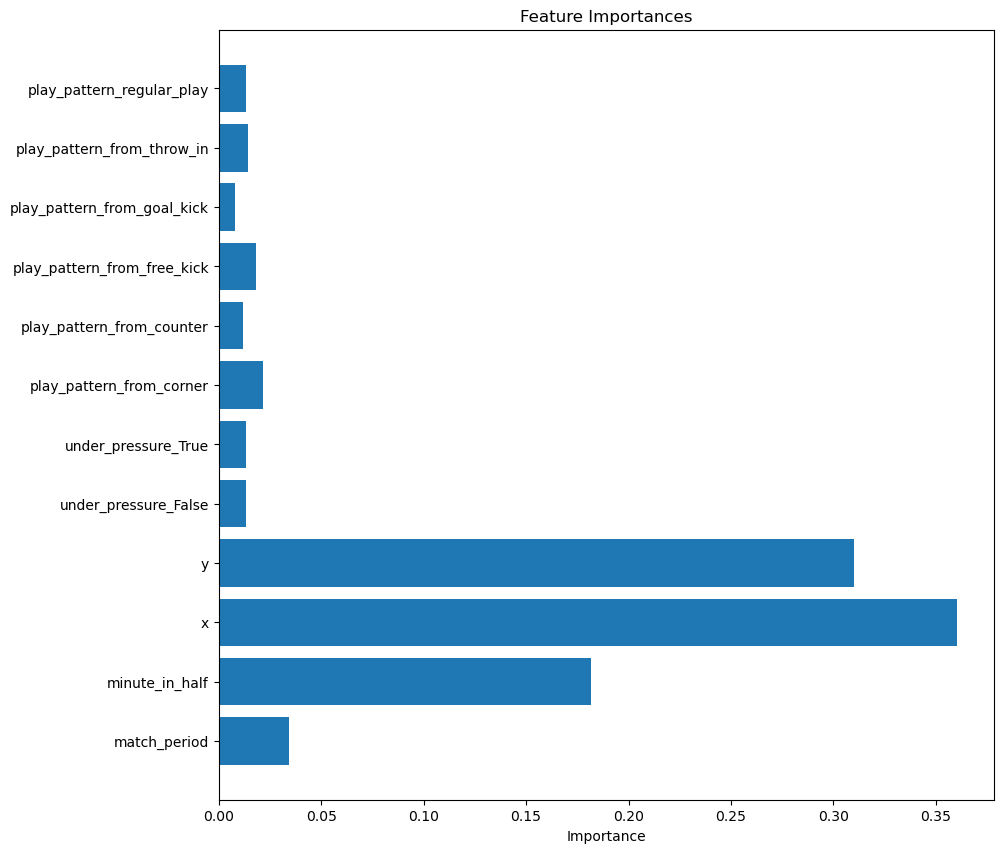

In [28]:
# Get feature importances
importances = model_rf.named_steps['classifier'].feature_importances_
print(importances)
# Get feature names after OneHotEncoding
feature_names = numeric_features + list(model_rf.named_steps['preprocessor'].transformers_[1][1].named_steps['encoder'].get_feature_names_out(categorical_features))

# Plot feature importances
plt.figure(figsize=(10, 10))
plt.barh(feature_names, importances)
plt.xlabel('Importance')
plt.title('Feature Importances')
plt.show()

### Use the Random Forest Model because of a higher F1 score on 1's

In [29]:
joblib.dump(model_rf, "../src/messigoalsmodel_rf.pkl")

['../src/messigoalsmodel_rf.pkl']

In [30]:
messi_goals_imp = joblib.load("../src/messigoalsmodel_rf.pkl")

2025-04-12 14:53:03.095 
  command:

    streamlit run c:\Users\vchan\anaconda3\Lib\site-packages\ipykernel_launcher.py [ARGUMENTS]


DeltaGenerator()

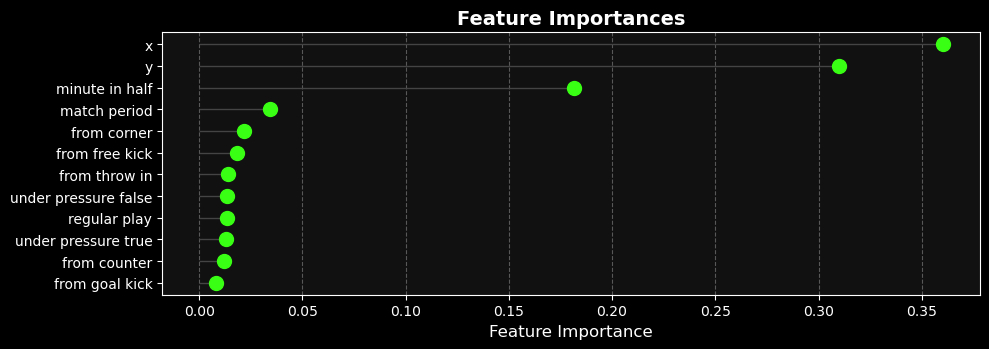

In [31]:
# Clean feature names
def clean_name(name):
    name = name.lower()
    if 'play_pattern_' in name:
        name = name.replace('play_pattern_', '')
    elif 'possession_team_' in name:
        name = name.replace('possession_team_', '')
    elif 'position_' in name:
        name = name.replace('position_', '')
    return name.replace('_', ' ')

# Sort by importance
sorted_idx = np.argsort(importances)
sorted_importances = importances[sorted_idx]
sorted_features = [clean_name(feature_names[i]) for i in sorted_idx]

# Dark mode styling
plt.style.use('dark_background')
fig, ax = plt.subplots(figsize=(10, len(sorted_features) * 0.3))
ax.set_facecolor('#111111')  # darker pitch background

# Draw lollipop chart
ax.hlines(y=sorted_features, xmin=0, xmax=sorted_importances, color='#444', linewidth=1)
ax.plot(sorted_importances, sorted_features, "o", markersize=10, color='#39ff14')  # neon green

# Axes and labels
ax.set_xlabel("Feature Importance", fontsize=12, color='white')
ax.set_title("Feature Importances", fontsize=14, color='white', weight='bold')
ax.tick_params(colors='white', labelsize=10)
ax.grid(axis='x', linestyle='--', alpha=0.3, color='white')
fig.tight_layout()

# Streamlit:
st.pyplot(fig)

In [32]:
X_train.dtypes

match_period        int64
minute_in_half      int64
play_pattern       object
under_pressure       bool
x                 float64
y                 float64
dtype: object